In [4]:
import numpy as np
import scipy.constants as sciconsts
import scipy.fftpack as fft
import scipy.interpolate as sci_interpolate
import matplotlib.pyplot as plt
import scipy.integrate as sci_integrate
import time
import sys
import seaborn as sns
import os  
import matplotlib  
import matplotlib.cm as cm   
from matplotlib.ticker import MultipleLocator  
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def chirp_mass(m1,m2):
    return np.power(m1*m2,0.6)/(np.power(m1+m2,0.2))
def solvem(mc,smr):
    a=mc/np.power(smr,0.6)
    b=smr*np.power(a,2.0)
    m1=(a+np.sqrt(np.power(a,2.0)-4.0*b))/2.0
    m2=(a-np.sqrt(np.power(a,2.0)-4.0*b))/2.0
    return np.array((m1,m2))
def sym_mass_ratio(m1,m2):
    return m1*m2/(np.power(m1+m2,2.0))

def listdir1(path):
    for file in os.listdir(path):  
        file_path = os.path.join(path, file)  
        if os.path.isdir(file_path):  
            listdir1(file_path)  
        else:
            if os.path.splitext(file_path)[1]=='.npy':
                print file_path
def listdir(path, list_name):  #传入存储的list
    for file in os.listdir(path):  
        file_path = os.path.join(path, file)  
        if os.path.isdir(file_path):
            listdir(file_path, list_name)  
        else: 
            if os.path.splitext(file_path)[1]=='.npy':
                list_name.append(file_path)
def importdata(filename):
    filename1='/Users/shyn/test/'+filename
    listdir1(filename1)
    nam1=[]
    listdir(filename1,nam1)
    g=np.array(nam1)
    data=np.load(g[0])
    for i in g[1:g.size]:
        a=np.load(i)
        data=np.concatenate((data,a))
    return data
def datapick(data,mode):
    result=[]
    if mode=='smr':
        
        

In [6]:
m_sun=1.9891e30
m=np.linspace(20,60,10000)
mc=chirp_mass(m,m)

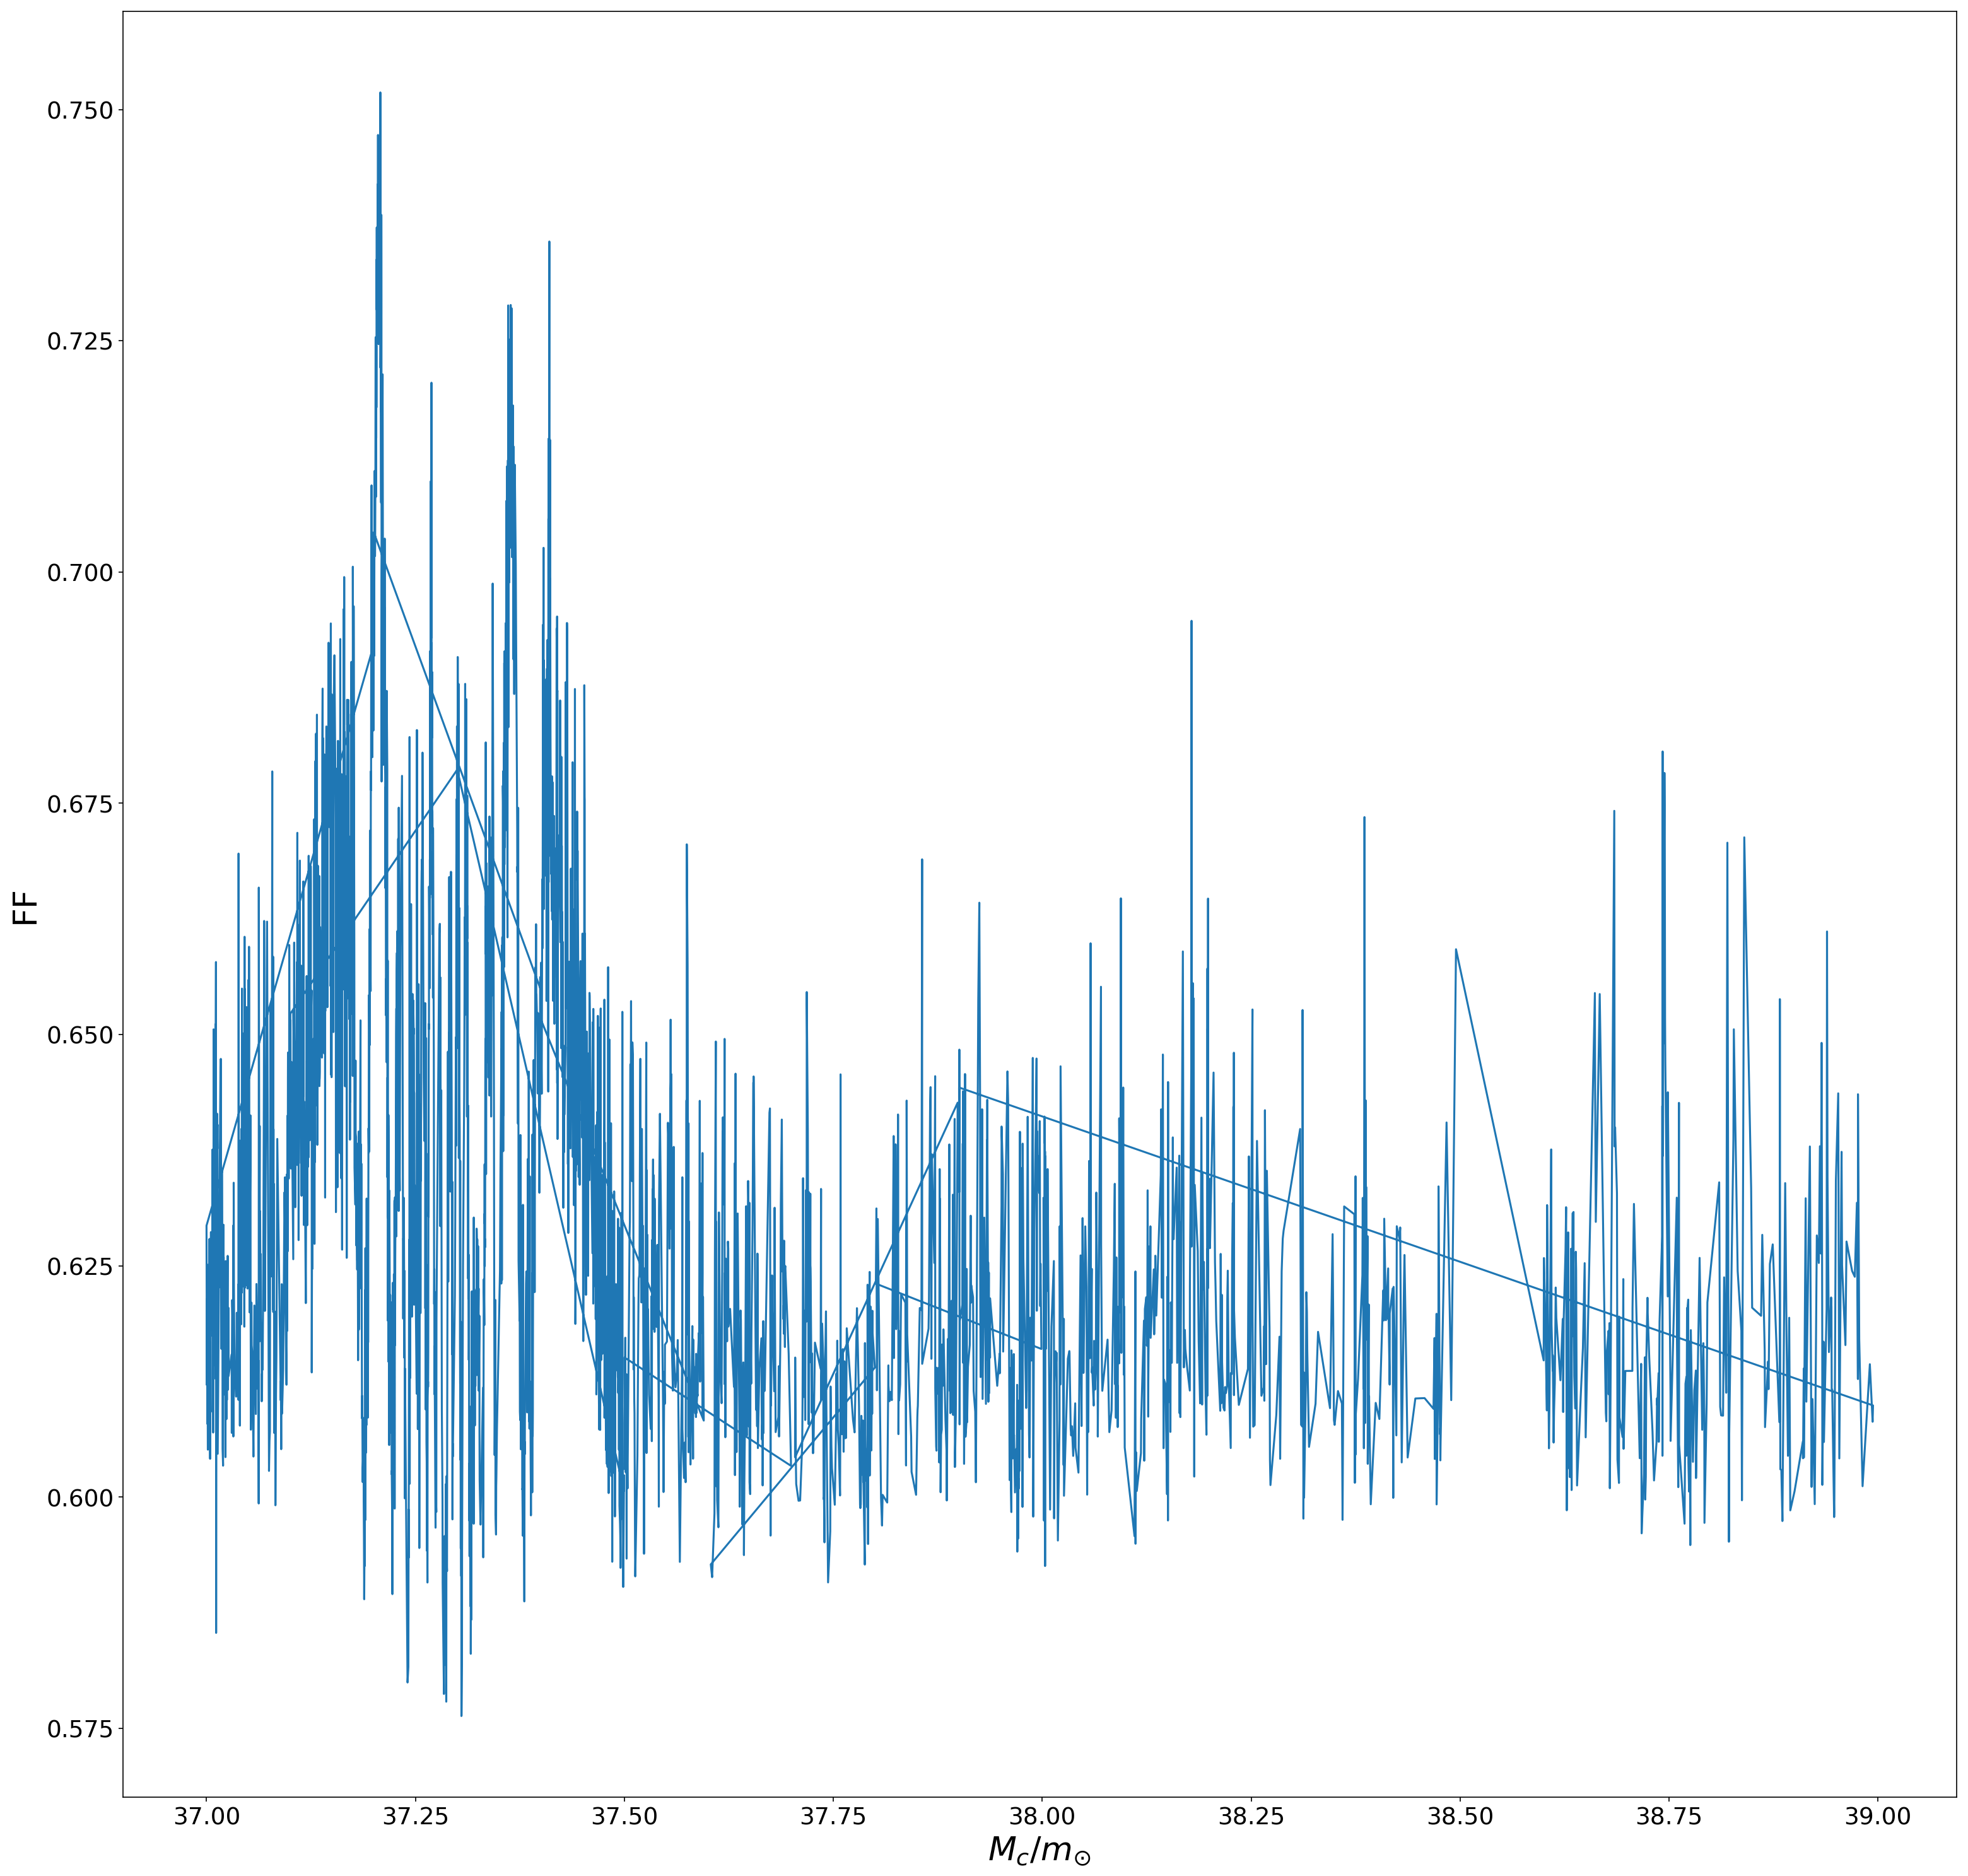

In [43]:

fig1=plt.figure(figsize=(25,25),dpi=150)
plt.ylabel('FF',fontsize=25)
plt.xlabel(r'$M_c/m_{\odot}$',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(an[:,0],an[:,1])

plt.show()

In [10]:
mcmax=data[:,2].max()
mcmin=data[:,2].min()
grid_x, grid_y = np.mgrid[mcmin:mcmax:0.0001, 0.24:0.25:0.00001]  
grid_z = sci_interpolate.griddata((data[:,2],data[:,3]),data[:,0], (grid_x, grid_y), method='linear')
fig = plt.figure(figsize=(50,50), dpi=150, facecolor="white")  
axes = plt.subplot(111)  
axes.cla()#清空坐标轴内的所有内容  
font = {'family' : 'serif',  
        'color'  : 'darkred',  
        'weight' : 'normal',  
        'size'   : 30,  
        }  
#将横纵坐标都映射到（0，1）的范围内  
extent=(0,1,0,1)  
#指定colormap  
cmap = matplotlib.cm.jet  
#设定每个图的colormap和colorbar所表示范围是一样的，即归一化 
vmin1=0
vmax1=1.0
norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)  
#显示图形，此处没有使用contourf #>>>ctf=plt.contourf(grid_x,grid_y,grid_z)  
gci=plt.imshow(grid_z.T, extent=extent, origin='lower',cmap=cmap, norm=norm)  
#配置一下坐标刻度等  
ax=plt.gca()  
ax.set_xticks(np.linspace(0,1,8))
f2=f1=f1=map(str,map(round,np.linspace(mcmin,mcmax,8),[2,2,2,2,2,2,2,2]))
ax.set_xticklabels(f2)  
ax.set_yticks(np.linspace(0,1,8))
f1=map(str,map(round,np.linspace(0.24,0.25,8),[4,4,4,4,4,4,4,4]))
ax.set_yticklabels(f1)  
#显示colorbar  
cbar = plt.colorbar(gci)  
cbar.set_label('fitting factor',fontdict=font)  
cbar.set_ticks(np.linspace(vmin1,vmax1,8))  
#设置label  
ax.set_ylabel('smr',fontdict=font)  
ax.set_xlabel('chrip mass',fontdict=font) 
#设置title  
#titleStr='$T_B$ for Freq = '+str(float(fp[1:-1])*0.01)+'GHz'  
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.title('ff cal result',fontdict=font)  
#figname=fp+'.png'  
plt.savefig('pre.png')  
plt.show() 

NameError: name 'Wplt' is not defined

In [7]:
data1=importdata('1YEARDATA')

/Users/shyn/test/1YEARDATA/36.65-37.85.npy


In [52]:
print 'maximum number ：',np.where(data1[:,0]==data1[:,0].max())[0].size
data1[np.where(data1[:,0]==data1[:,0].max())[0][0:np.where(data1[:,0]==data1[:,0].max())[0].size]]

maximum number ： 1


array([[  9.60823605e-01,   1.41383280e-03,   3.69388889e+01,
          2.41616162e-01,   0.00000000e+00]])

array([ 0.,  0.,  0.,  0.,  0.])

array([  6.18602550e-01,   1.82567555e-03,   3.75600000e+01,
         2.40101010e-01,   6.34665183e-02])

In [53]:
result=[]

AttributeError: 'list' object has no attribute 'size'

In [60]:
sci_integrate.quad(lambda x:2.6e22/(np.power(x,6.6)*(np.exp(320.0/x)-1.0)),8,1000,limit=1500,epsabs=0.005)[0]

1.5325590580760116

In [ ]:
b